## Imports

In [1]:
from utils import *

In [81]:
df = pd.read_csv('data/dataset_SCL.csv')
#Notebooks/globant/Copy of dataset_SCL.csv

C:\Users\Federico Young\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [82]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## Tweak features

In [83]:
df = (df
      .rename(columns = lambda c: c.replace('-','_'))
      .assign(Fecha_I =  pd.to_datetime(df['Fecha-I']),
              Fecha_O = pd.to_datetime(df['Fecha-O']),
              DIA= df['DIA'].astype('str'),
              MES = df['MES'].astype('str'),
              AÑO = df['AÑO'].astype('str')
              #Des_I = df['Des-I'].astype('category')
             )
     )

In [84]:
df[~(df.Vlo_I == df.Vlo_O)]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65532,2017-12-16 13:41:00,265,SCEL,SCTE,LAN,2017-12-16 13:49:00,265.0,SCEL,SCTE,LXP,16,12,2017,Sabado,N,Grupo LATAM,Santiago,Puerto Montt
65533,2017-12-18 15:59:00,265,SCEL,SCTE,LAN,2017-12-18 16:07:00,265.0,SCEL,SCTE,LXP,18,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt
65534,2017-12-19 15:11:00,265,SCEL,SCTE,LAN,2017-12-19 15:10:00,265.0,SCEL,SCTE,LXP,19,12,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt
65535,2017-12-25 16:19:00,265,SCEL,SCTE,LAN,2017-12-25 16:24:00,265.0,SCEL,SCTE,LXP,25,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt


In [85]:
df[~(df.Ori_I == df.Ori_O)]

,Fecha_I,Vlo_I,Ori_I,Des_I,Emp_I,Fecha_O,Vlo_O,Ori_O,Des_O,Emp_O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [86]:
df[~(df.Des_I == df.Des_O)][['Des_I','Des_O','SIGLADES']]
#28 vuelos que iban a un destino y terminaron en otro

,Des_I,Des_O,SIGLADES
1397,SCTE,SCQP,Temuco
7290,SCTE,SCQP,Temuco
7520,SCIE,SCQP,Temuco
8456,SCTE,SCQP,Temuco
12787,SCTE,SCQP,Temuco
12823,SCBA,SCTE,Puerto Montt
16169,KJFK,KMIA,Miami
16937,SEGU,SABE,Buenos Aires
18293,SCTE,SCQP,Temuco
20444,SCTE,SCCI,Punta Arenas


In [87]:
df[~(df.Emp_I == df.Emp_O)][['Emp_I','Emp_O','OPERA']]

,Emp_I,Emp_O,OPERA
345,AUT,ARG,Austral
814,AVA,LRC,Avianca
815,AVA,LRC,Avianca
816,AVA,LRC,Avianca
817,AVA,LRC,Avianca
...,...,...,...
67877,LAW,JMR,Latin American Wings
67878,LAW,JMR,Latin American Wings
67879,LAW,JMR,Latin American Wings
67880,LAW,JMR,Latin American Wings


In [88]:
#Son todos vuelos que salen de Santiago
df.Ori_I.value_counts()

SCEL    68206
Name: Ori_I, dtype: int64

## Diferencia en minutos

In [89]:
df['dif_min'] = ((df.Fecha_O-df.Fecha_I)
                 .astype('timedelta64[m]')
                )

<AxesSubplot:>

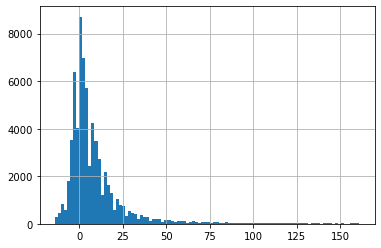

In [90]:
df['dif_min'].hist(bins=100)

## Target: atraso_15

In [91]:
#n es el retraso del vuelo en min... la tolerancia
n=15

In [92]:
df['atraso_15'] = (df['dif_min'] > n)*1

## temporada_alta

: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

In [93]:
temporada_alta = (
    (df.Fecha_I.dt.date >= datetime.date(2017, 12, 15)
    ) | 
    (df.Fecha_I.dt.date <= datetime.date(2017, 3, 3)
    ) | 
    ((df.Fecha_I.dt.date >= datetime.date(2017, 7, 15)) & 
     (df.Fecha_I.dt.date <= datetime.date(2017, 7, 31))
    ) | 
    ((df.Fecha_I.dt.date >= datetime.date(2017, 9, 11)) & 
     (df.Fecha_I.dt.date <= datetime.date(2017, 9, 30))
    )
)

In [94]:
df['temporada_alta'] = temporada_alta * 1

In [95]:
df['temporada_alta'].value_counts()

0    45444
1    22762
Name: temporada_alta, dtype: int64

## periodo_dia 

 mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [96]:
def periodo_del_dia(x):
    if (x >= datetime.time(5, 0)) & (x <= datetime.time(11, 59)): 
        return 'mañana'
    elif (x >= datetime.time(12, 0)) & (x <= datetime.time(18, 59)):
        return 'tarde'
    return 'noche'

In [97]:
df['periodo_dia'] = (df['Fecha_I']
                     .dt
                     .time
                     .apply(periodo_del_dia)
                    )

## Create synthetic_features.csv

In [98]:
df.columns

Index(['Fecha_I', 'Vlo_I', 'Ori_I', 'Des_I', 'Emp_I', 'Fecha_O', 'Vlo_O',
       'Ori_O', 'Des_O', 'Emp_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'dif_min', 'atraso_15',
       'temporada_alta', 'periodo_dia'],
      dtype='object')

In [18]:
df.to_csv('synthetic_features.csv',
          columns= ['temporada_alta',
                   'dif_min',
                   'atraso_15',
                   'periodo_dia'
                   ],
          index=False
         )

In [19]:
synthetic_features = pd.read_csv('synthetic_features.csv')
synthetic_features.head()

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,-2.0,0,noche


## Cuantos vuelos hay a la misma hora

In [99]:
df = (df.assign(cantidad_vuelos_hora = (df.groupby(['Fecha_I'])['Fecha_I']
                                        .transform('count')
                                       )
               )
     )

## EDA

### Destino

C:\Users\Federico Young\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


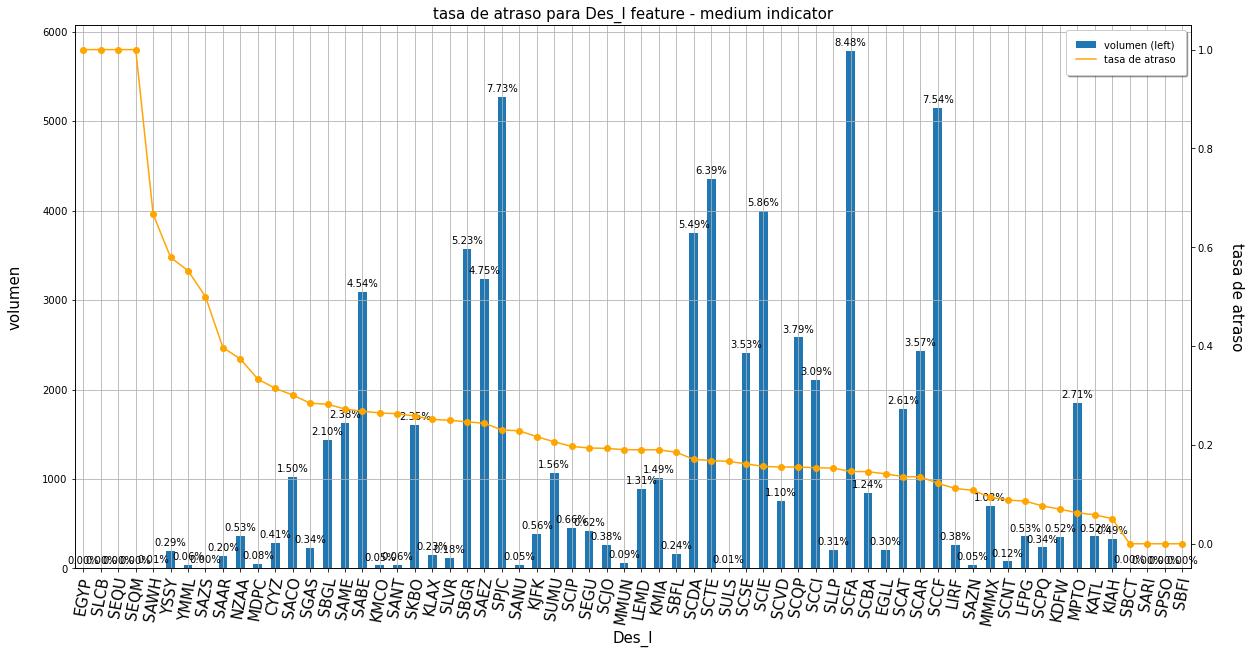

In [100]:
iv_df , iv = data_vars(df[['Des_I']],df['atraso_15'])
plot_bivariant(iv_df, 'Des_I', 'Des_I')

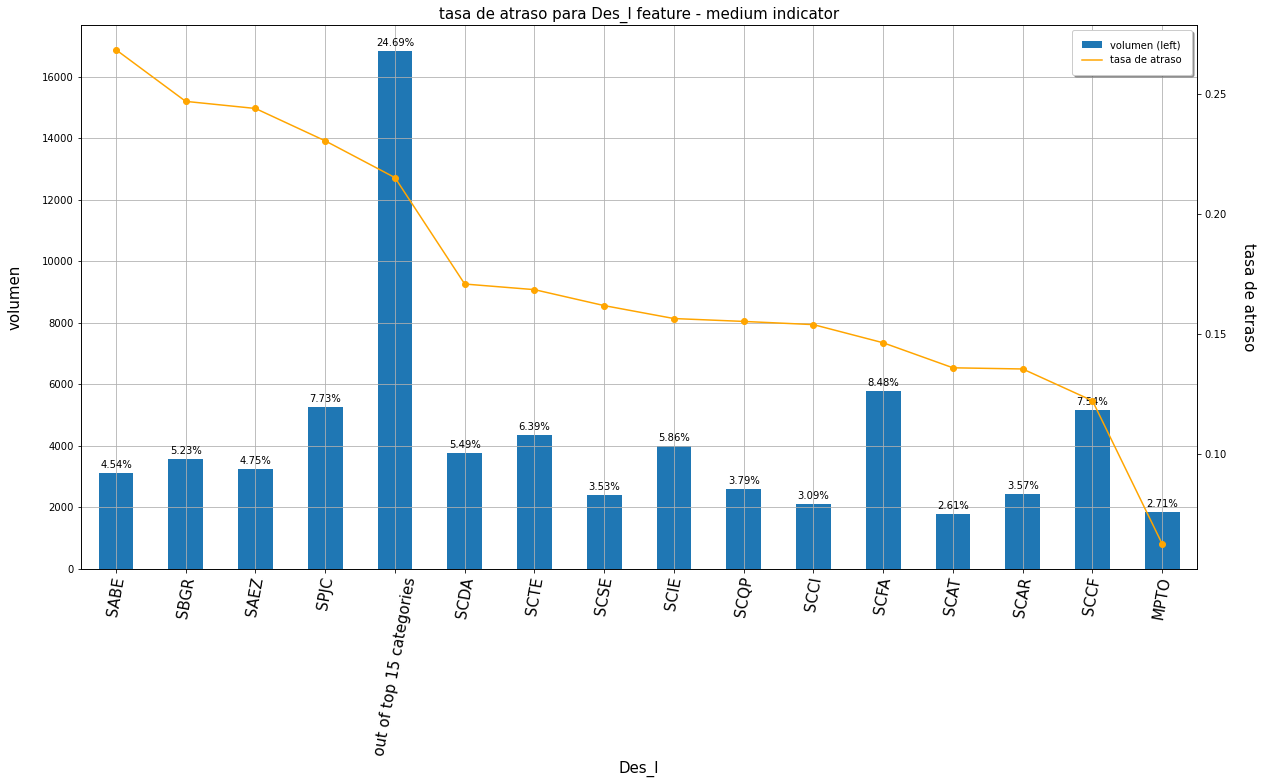

In [101]:
df = group_top_x_amount_of_categories(df, 'Des_I', 15)
iv_df , iv = data_vars(df[['Des_I']],df['atraso_15'])
plot_bivariant(iv_df, 'Des_I', 'Des_I')

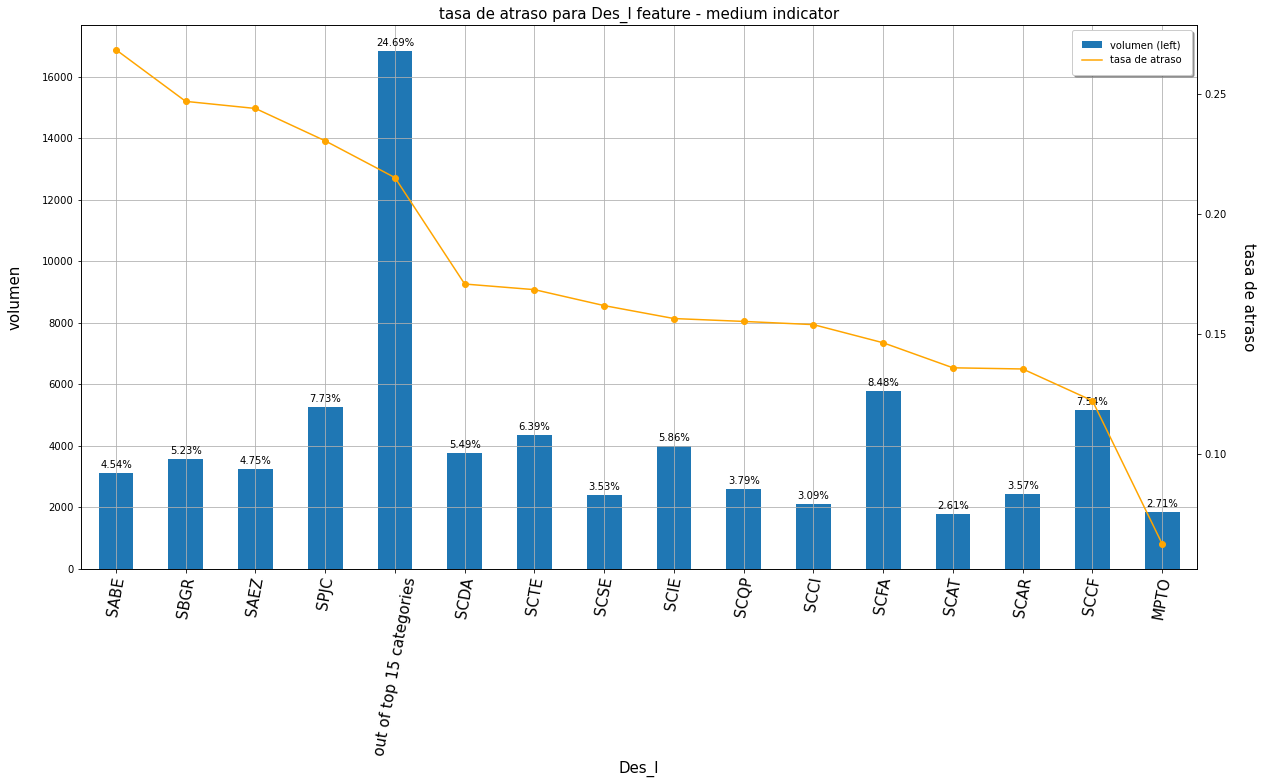

In [11]:
df = group_top_x_amount_of_categories(df, 'Des_I', 15)
iv_df , iv = data_vars(new_df[['Des_I']],new_df['atraso_15'])
plot_bivariant(iv_df, 'Des_I', 'Des_I')

### Aerolinea

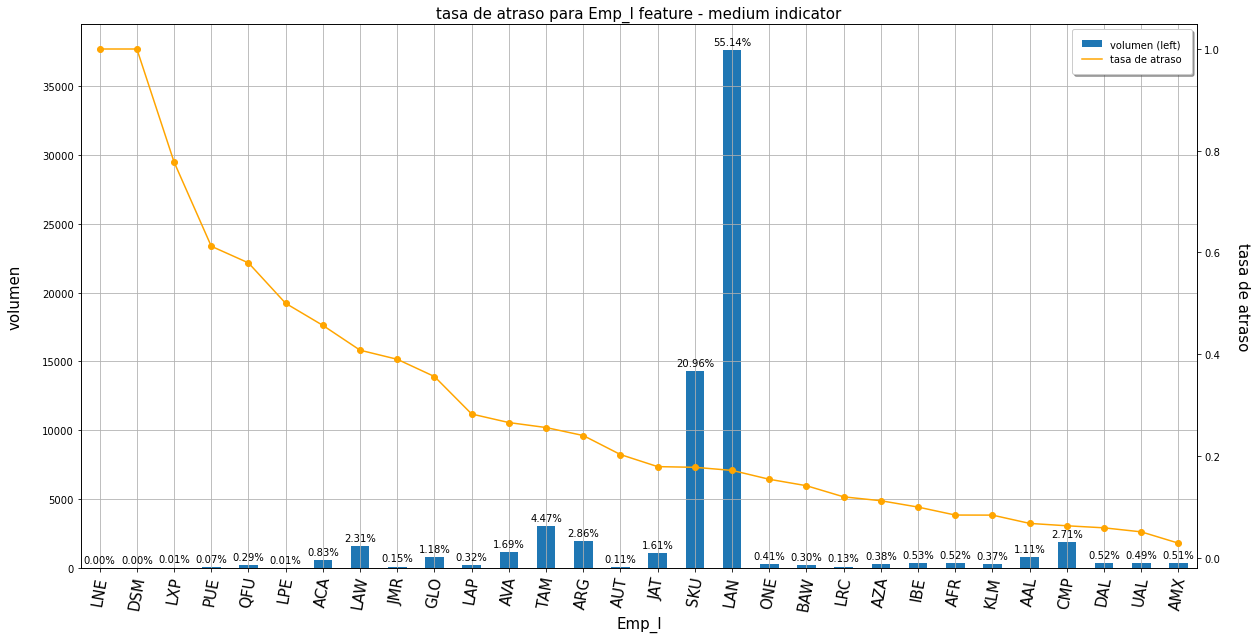

In [23]:
iv_df , iv = data_vars(df[['Emp_I']],df['atraso_15'])
plot_bivariant(iv_df, 'Emp_I', 'Emp_I')

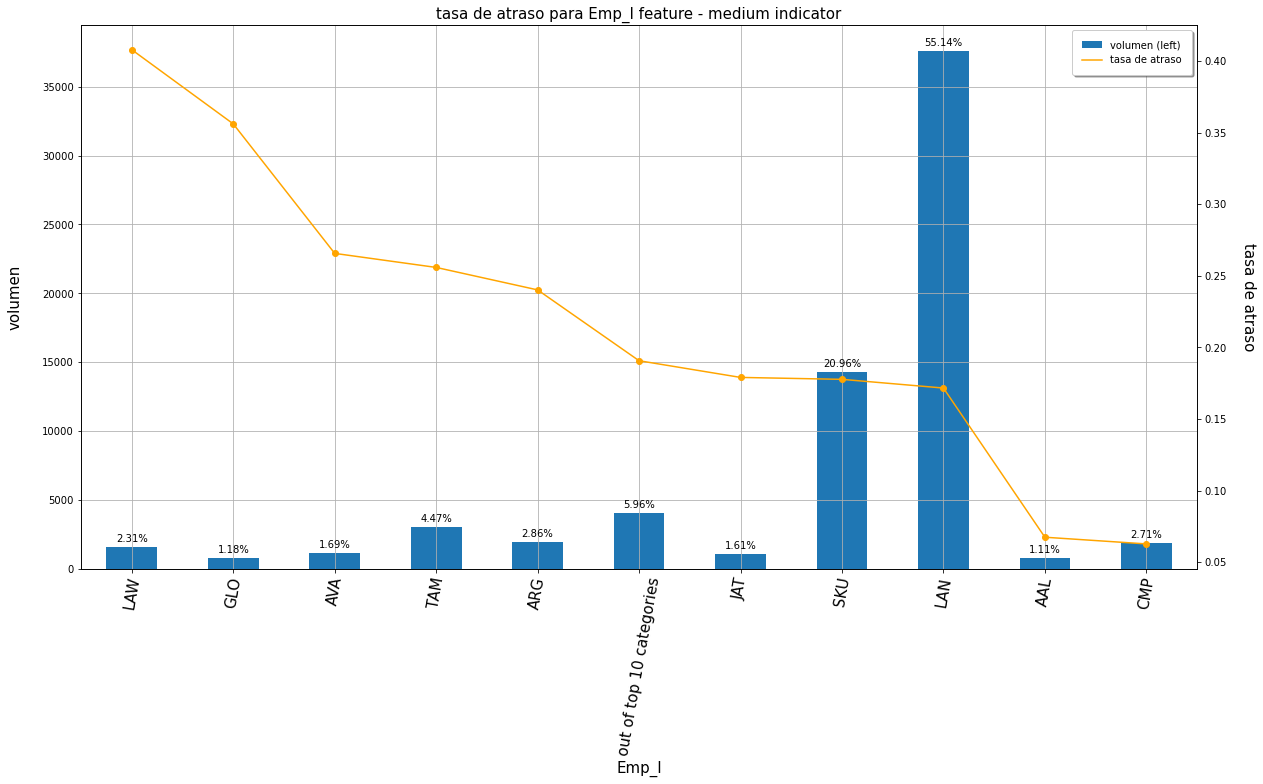

In [102]:
df = group_top_x_amount_of_categories(df, 'Emp_I', 10)
iv_df , iv = data_vars(df[['Emp_I']],df['atraso_15'])
plot_bivariant(iv_df, 'Emp_I', 'Emp_I')

### Mes del año

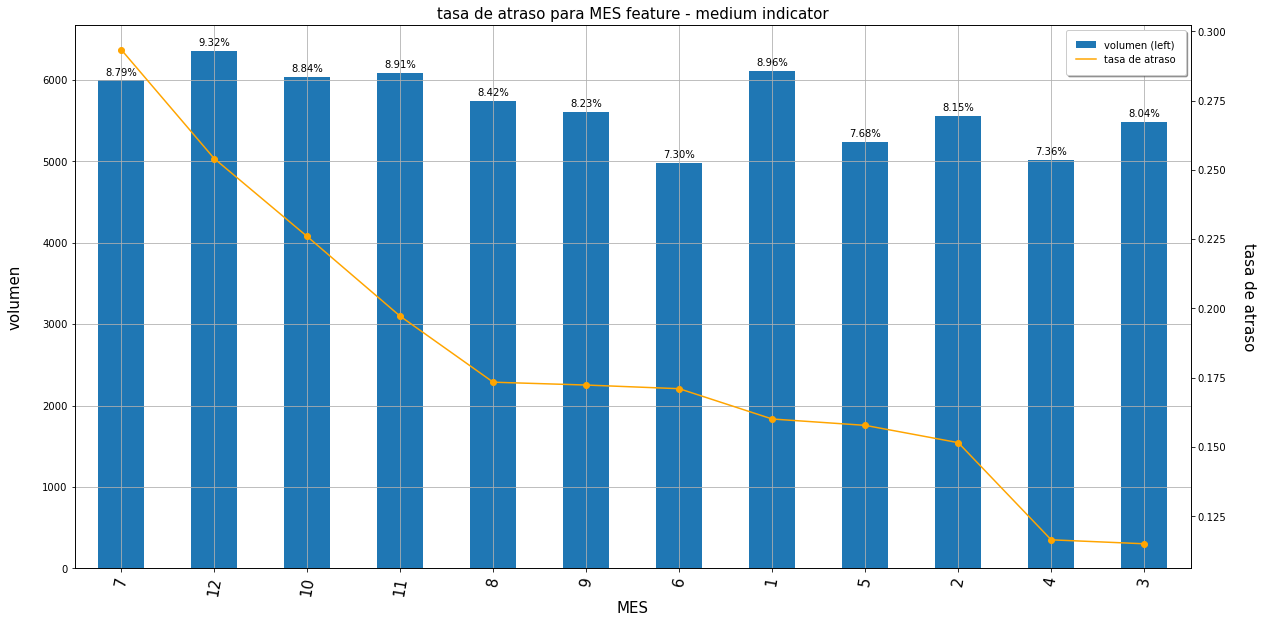

In [25]:
iv_df , iv = data_vars(df[['MES']],df['atraso_15']) 
plot_bivariant(iv_df, 'MES', 'MES')

### Dia de la semana

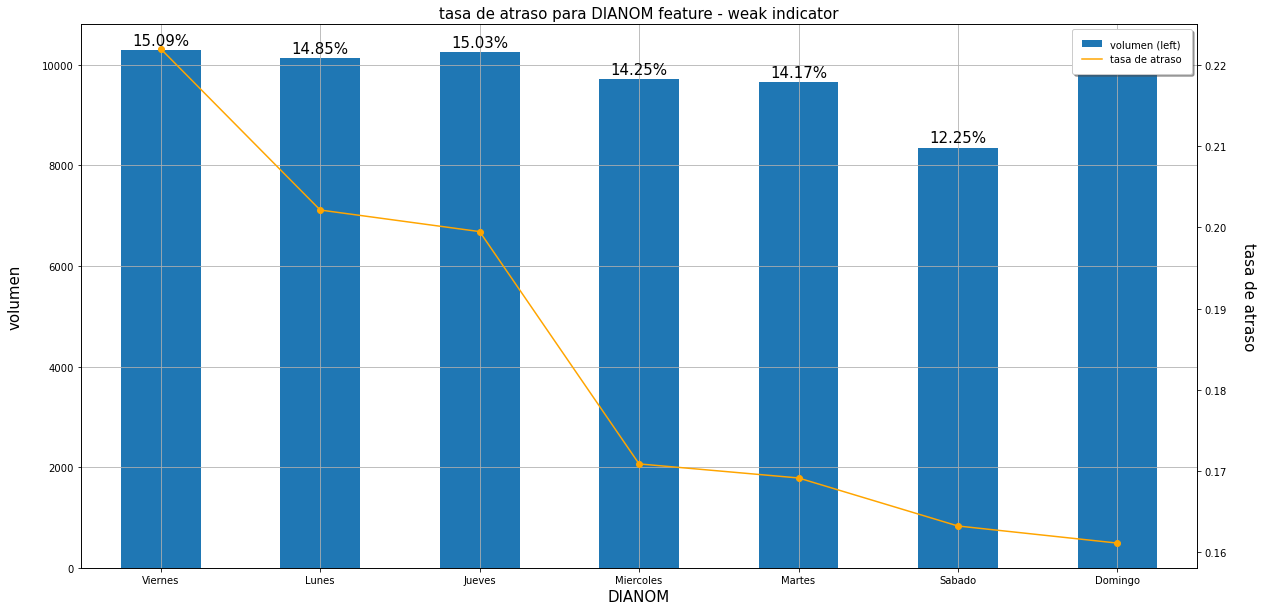

In [26]:
iv_df , iv = data_vars(df[['DIANOM']],df['atraso_15']) 
plot_bivariant(iv_df, 'DIANOM', 'DIANOM')

### Tipo de vuelo

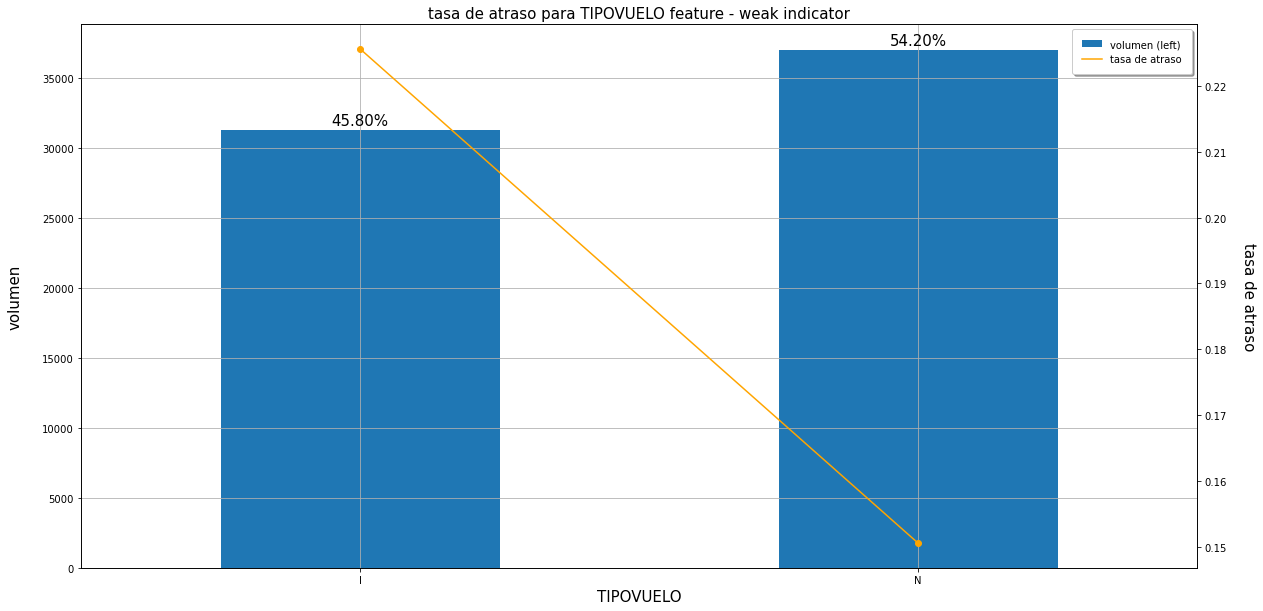

In [27]:
iv_df , iv = data_vars(df[['TIPOVUELO']],df['atraso_15']) 
plot_bivariant(iv_df, 'TIPOVUELO', 'TIPOVUELO')

### Temporada

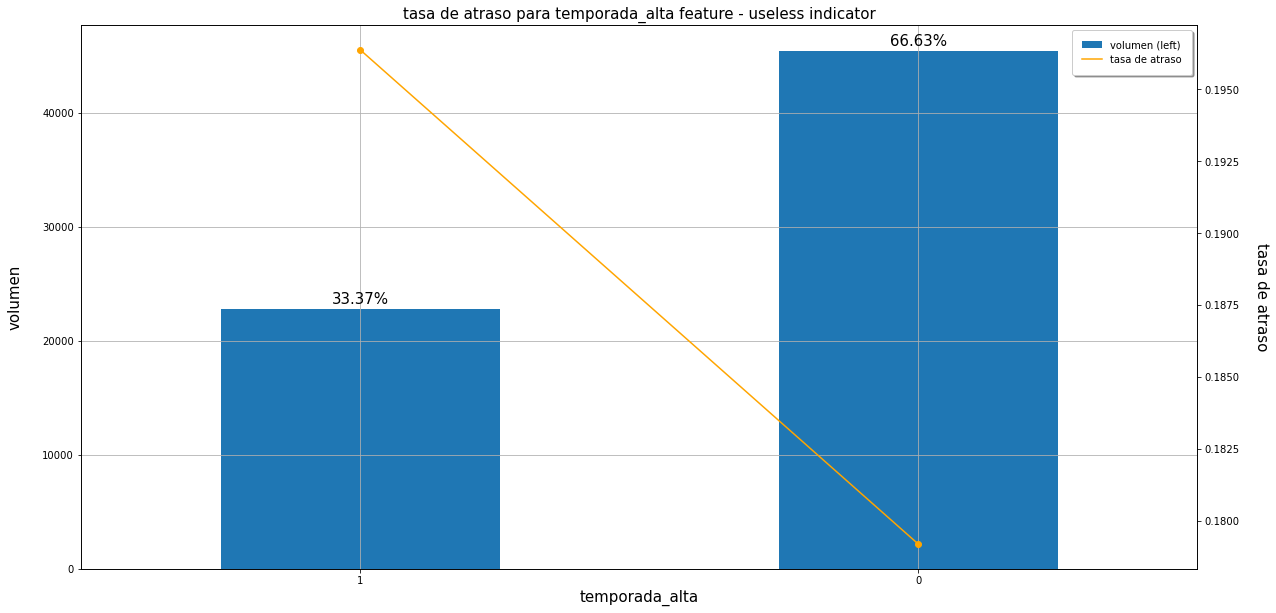

In [28]:
iv_df , iv = data_vars(df[['temporada_alta']],df['atraso_15']) 
plot_bivariant(iv_df, 'temporada_alta', 'temporada_alta')

Las variables que esperaria que mas influyeran en el modelo son:
- Destino
- Aerolinea
- Mes del año


### Periodo_dia

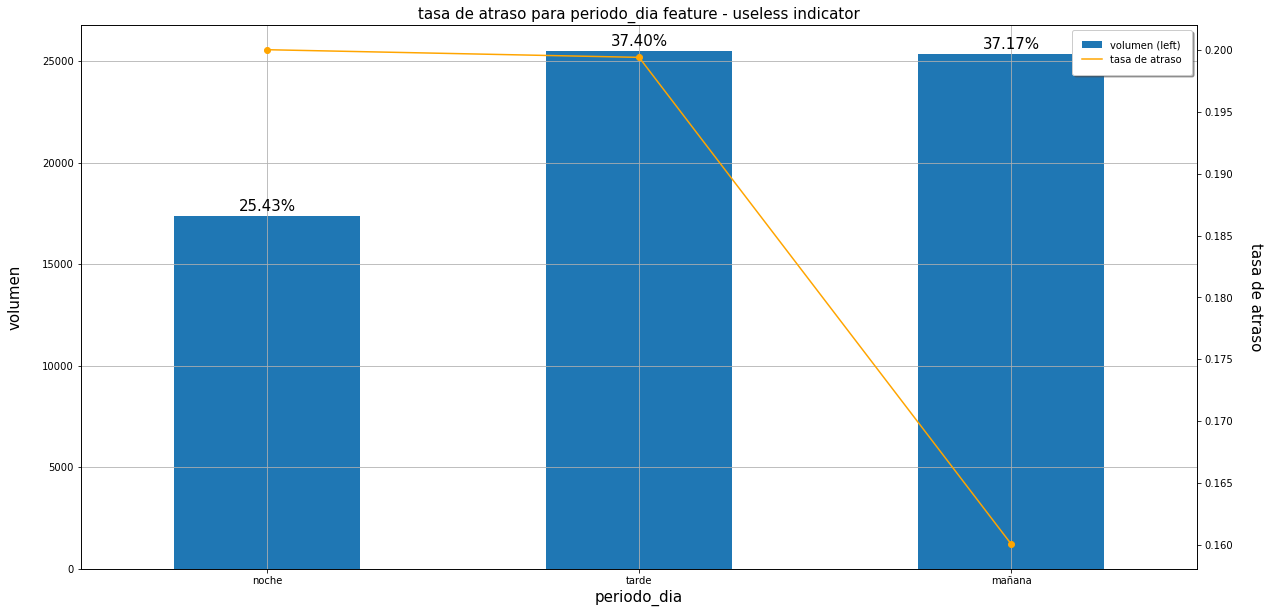

In [29]:
iv_df , iv = data_vars(df[['periodo_dia']],df['atraso_15']) 
plot_bivariant(iv_df, 'periodo_dia', 'periodo_dia')

## Variables adicionales

### Semana_del_año

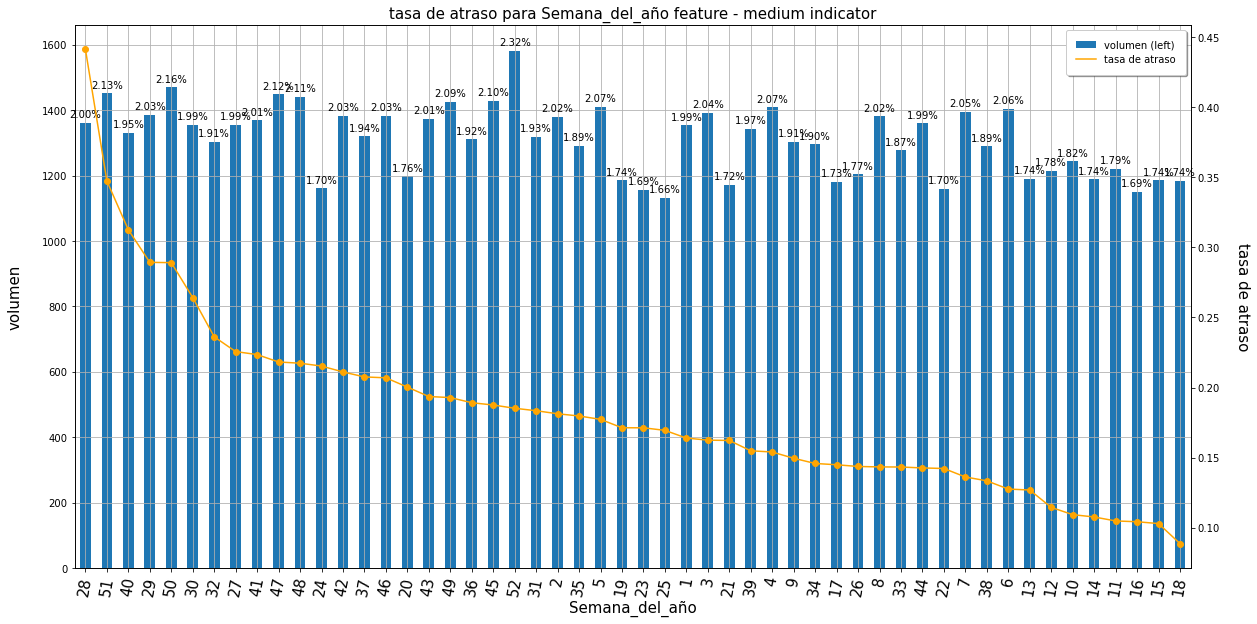

In [103]:
#week of year
df['Semana_del_año'] =  df.Fecha_I.dt.isocalendar().week.astype(int).apply(str)
iv_df , iv = data_vars(df[['Semana_del_año']],df['atraso_15']) 
plot_bivariant(iv_df, 'Semana_del_año', 'Semana_del_año')

In [104]:
iv_df['decile_semana'], bins =pd.qcut(iv_df['EVENT_RATE'], q=10, retbins=True, labels = False)

In [105]:
iv_df['decile_semana'] += 1

In [106]:
dict_ = {}
for week in iv_df['MIN_VALUE']:
    dict_[week] = iv_df[iv_df['MIN_VALUE'] == week]['decile_semana'].values

In [107]:
#df['decile_semana']
df['decile_semana'] = df['Semana_del_año'].map(dict_).str[0].astype('str')

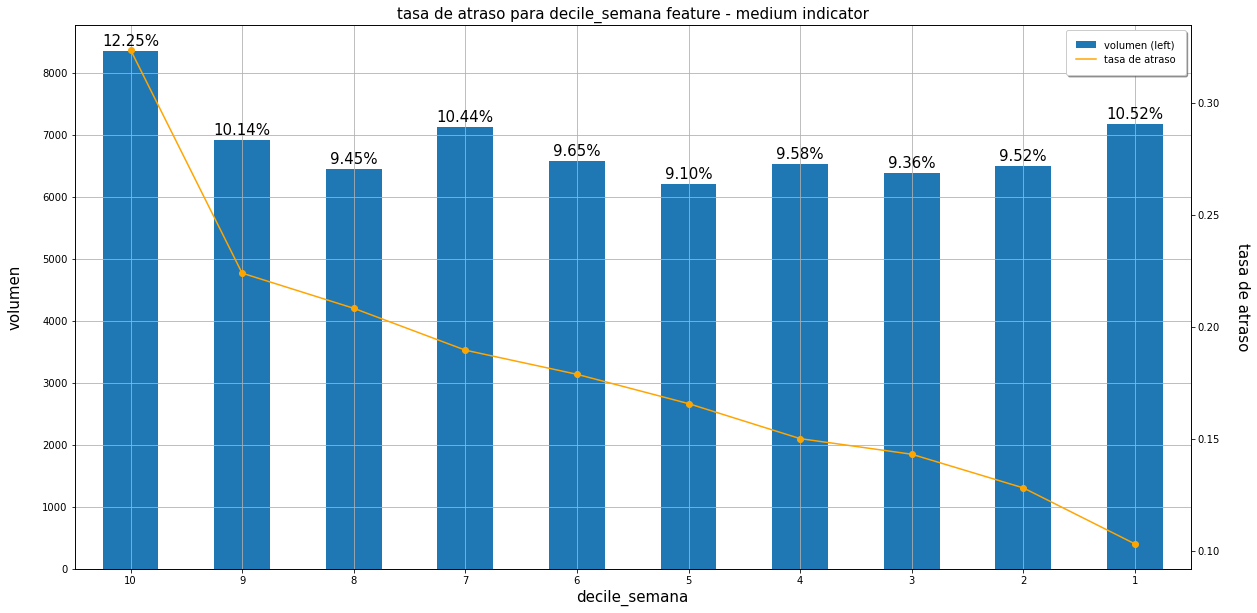

In [108]:
iv_df , iv = data_vars(df[['decile_semana']],df['atraso_15']) 
plot_bivariant(iv_df, 'decile_semana', 'decile_semana')

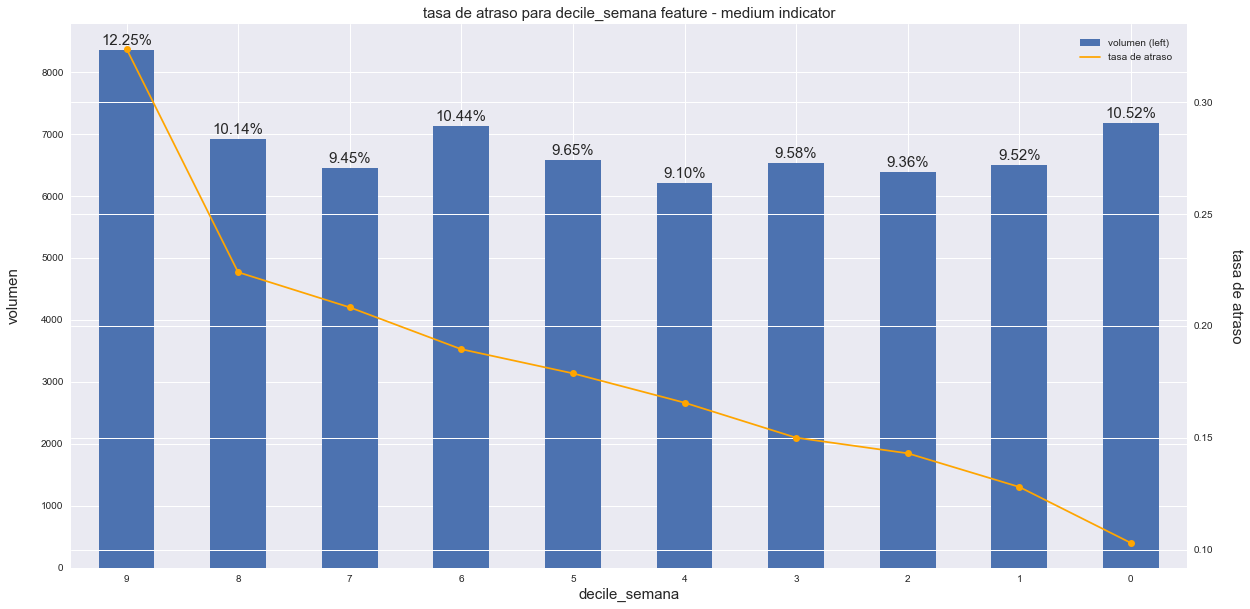

In [447]:
iv_df , iv = data_vars(df[['decile_semana']],df['atraso_15']) 
plot_bivariant(iv_df, 'decile_semana', 'decile_semana')

In [210]:
vacaciones = ['28','51','40','29','50','30']

### cantidad de vuelos por hora

In [109]:
df = (df
      .assign(cantidad_vuelos_hora = (df
                                      .groupby(['Fecha_I'])['Fecha_I']
                                      .transform('count')
                                      .apply(str)
                                     )
             )
     )

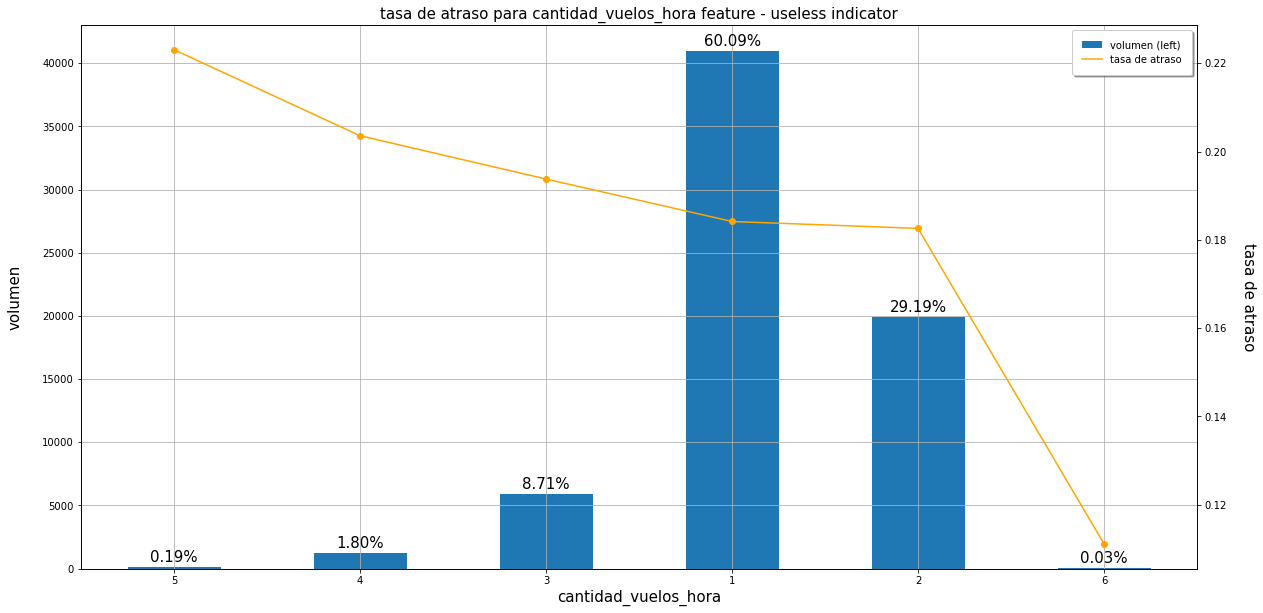

In [110]:
iv_df , iv = data_vars(df[['cantidad_vuelos_hora']],df['atraso_15']) 
plot_bivariant(iv_df, 'cantidad_vuelos_hora', 'cantidad_vuelos_hora')

## Model

### XGB

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha_I               68206 non-null  datetime64[ns]
 1   Vlo_I                 68206 non-null  object        
 2   Ori_I                 68206 non-null  object        
 3   Des_I                 68206 non-null  object        
 4   Emp_I                 68206 non-null  object        
 5   Fecha_O               68206 non-null  datetime64[ns]
 6   Vlo_O                 68205 non-null  object        
 7   Ori_O                 68206 non-null  object        
 8   Des_O                 68206 non-null  object        
 9   Emp_O                 68206 non-null  object        
 10  DIA                   68206 non-null  object        
 11  MES                   68206 non-null  object        
 12  AÑO                   68206 non-null  object        
 13  DIANOM          

In [117]:
df.columns

Index(['Fecha_I', 'Vlo_I', 'Ori_I', 'Des_I', 'Emp_I', 'Fecha_O', 'Vlo_O',
       'Ori_O', 'Des_O', 'Emp_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'dif_min', 'atraso_15', 'periodo_dia',
       'temporada_alta', 'Semana_del_año', 'cantidad_vuelos_hora'],
      dtype='object')

In [111]:
df_model = (df.drop(['Fecha_I'
                     ,'Vlo_I',
                     'Ori_I',
                     'Fecha_O',
                     'Vlo_O',
                     'Ori_O', 
                     'Des_O', 
                     'Emp_O', 
                     'DIA',
                     'AÑO',
                     'OPERA', 
                     'SIGLAORI',
                     'SIGLADES',
                     'dif_min',
                    'Semana_del_año'], 
                   axis=1
                  )
            .assign(cantidad_vuelos_hora = df.cantidad_vuelos_hora.astype(int) 
                   )
           )

In [112]:
target = 'atraso_15'

In [113]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Des_I                 68206 non-null  object
 1   Emp_I                 68206 non-null  object
 2   MES                   68206 non-null  object
 3   DIANOM                68206 non-null  object
 4   TIPOVUELO             68206 non-null  object
 5   atraso_15             68206 non-null  int32 
 6   temporada_alta        68206 non-null  int32 
 7   periodo_dia           68206 non-null  object
 8   cantidad_vuelos_hora  68206 non-null  int32 
 9   decile_semana         68206 non-null  object
dtypes: int32(3), object(7)
memory usage: 4.4+ MB


In [26]:
#features_to_model = ['Des_I','Emp_I','DIANOM','MES','TIPOVUELO','retraso']

In [27]:
#df_model = df[features_to_model]

In [120]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Des_I      68206 non-null  object
 1   Emp_I      68206 non-null  object
 2   DIANOM     68206 non-null  object
 3   MES        68206 non-null  object
 4   TIPOVUELO  68206 non-null  object
 5   retraso    68206 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.1+ MB


In [114]:
df_model_final = pd.get_dummies(df_model, drop_first = True )

In [115]:
df_model_final

,atraso_15,temporada_alta,cantidad_vuelos_hora,Des_I_SABE,Des_I_SAEZ,Des_I_SBGR,Des_I_SCAR,Des_I_SCAT,Des_I_SCCF,Des_I_SCCI,...,periodo_dia_tarde,decile_semana_10,decile_semana_2,decile_semana_3,decile_semana_4,decile_semana_5,decile_semana_6,decile_semana_7,decile_semana_8,decile_semana_9
0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,1,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
68202,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
68203,1,1,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
68204,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [116]:
X_train, X_test, y_train, y_test = train_test_split(df_model_final.drop(target,axis=1),
                                                df_model_final[target],
                                                test_size = 0.2,
                                                random_state = 42,
                                                stratify=df_model_final[target] #due to imbalanced data
                                               )

In [117]:
#COn reduccion de cardinalidad
classifier= XGBClassifier()
classifier.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = classifier.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

Mean ROC AUC in train: 0.71264
ROC AUC in test: 0.71951


<Figure size 1440x1440 with 0 Axes>

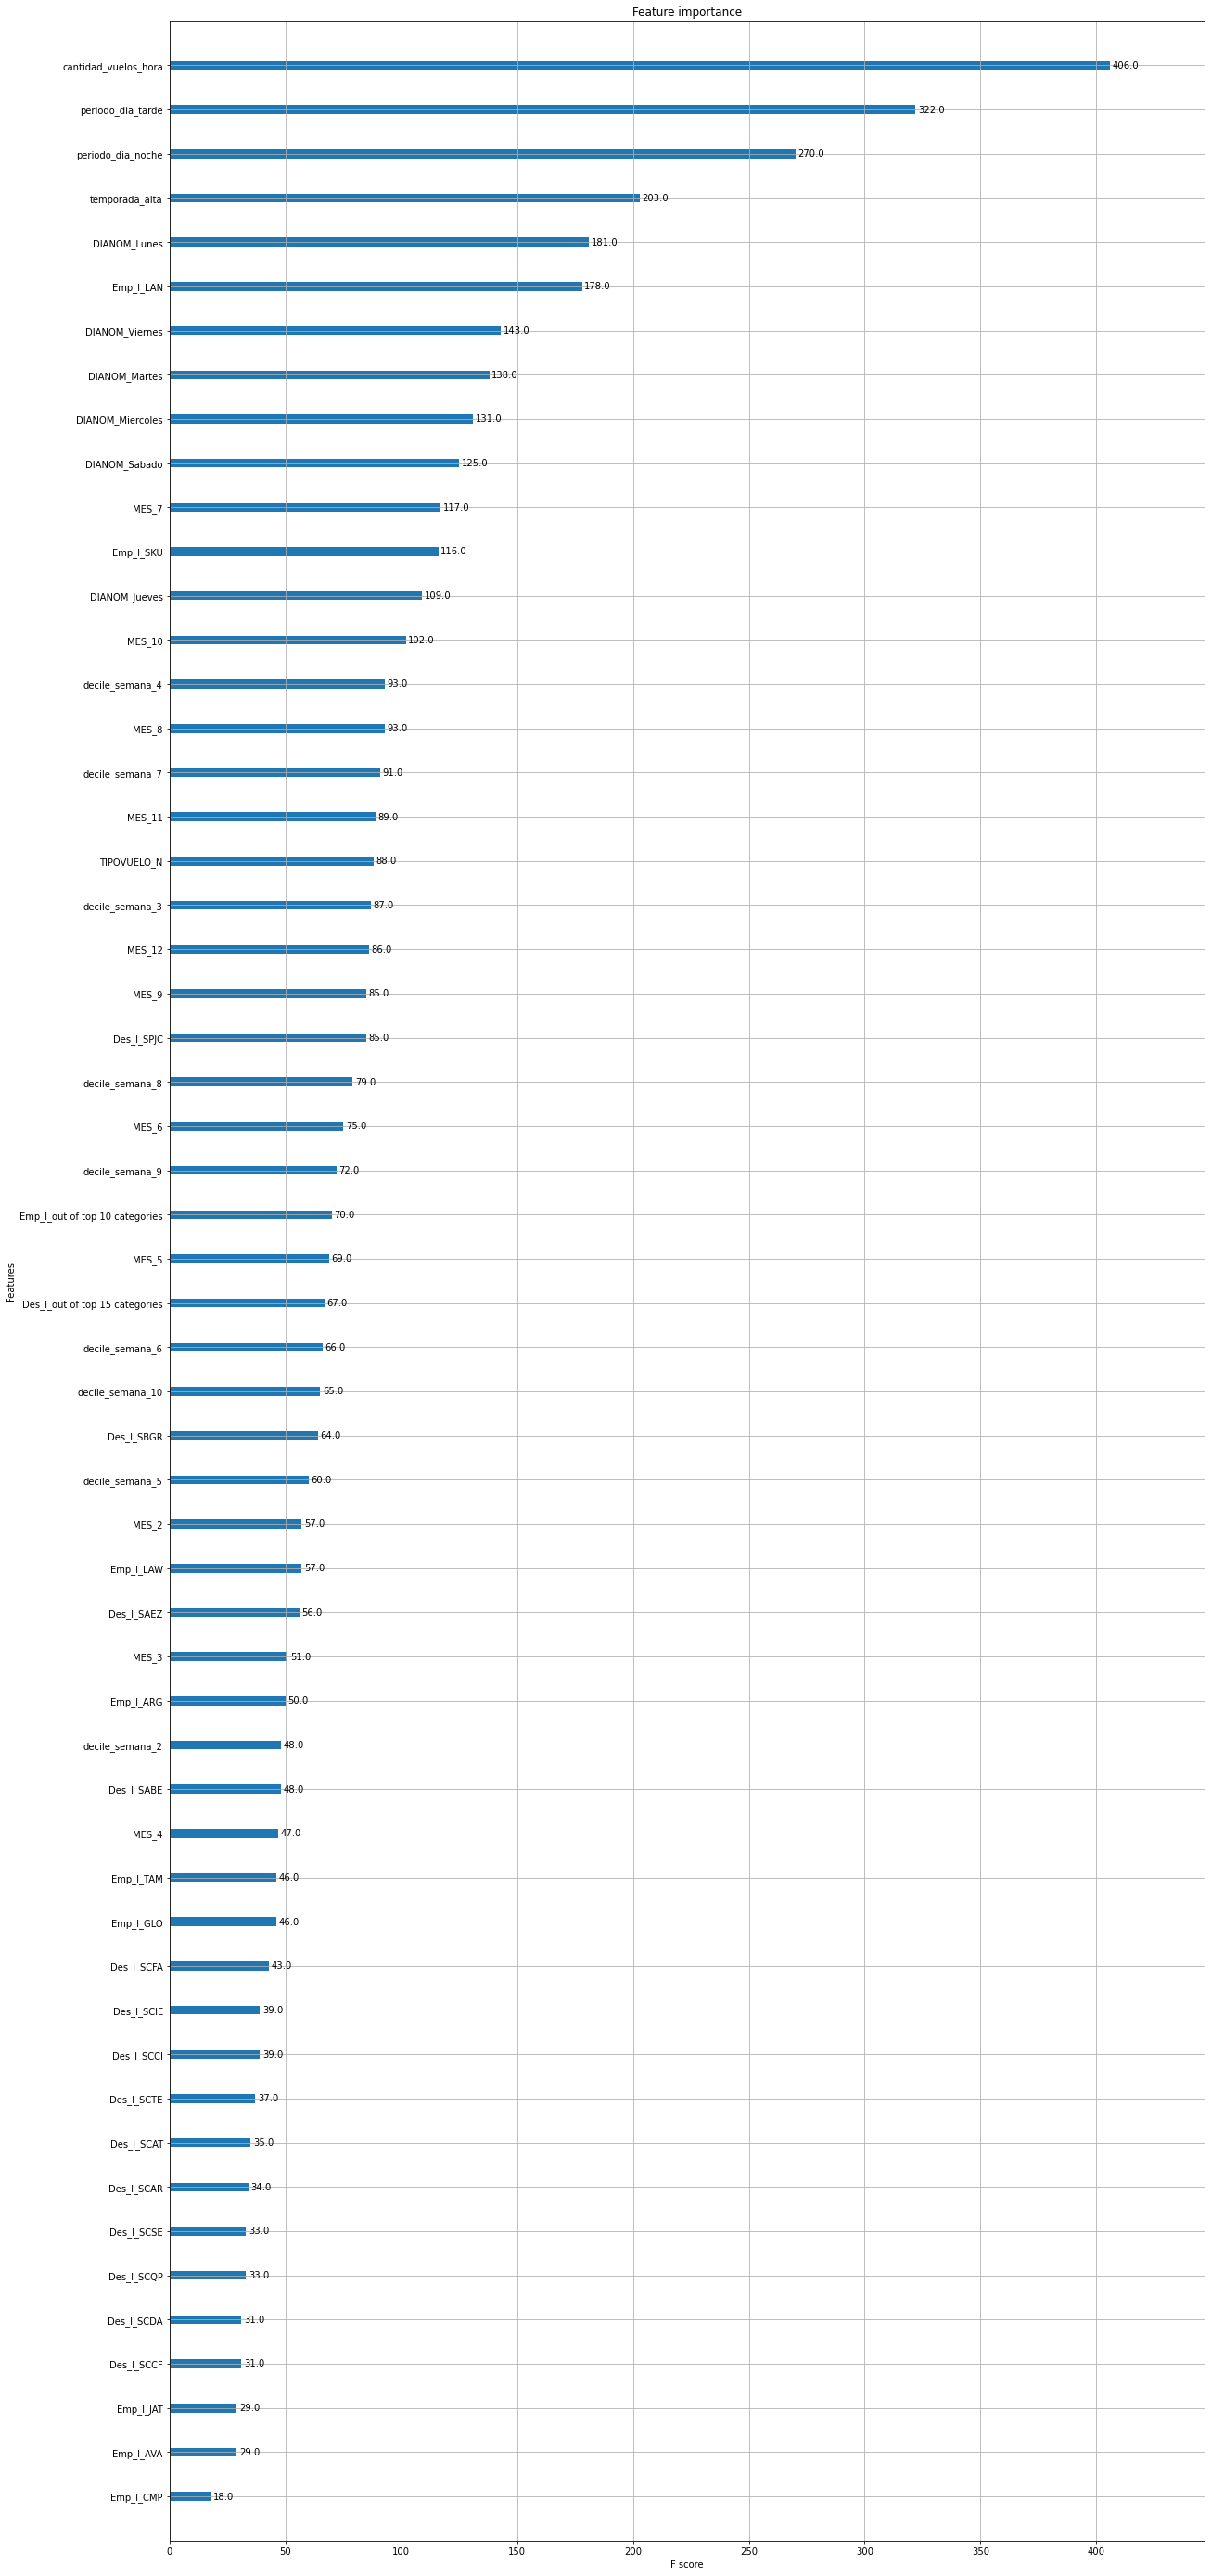

In [123]:
plt.figure(figsize=(20,20))
plot_importance(classifier)
plt.rcParams["figure.figsize"] = (20,50)
plt.show()

In [156]:
classifier= XGBClassifier()
classifier.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = classifier.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

Mean ROC AUC in train: 0.72577
ROC AUC in test: 0.72642


In [263]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [264]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [265]:
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs

In [268]:
target

'atraso_15'

In [271]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop(target,axis=1), df_model[target], test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, fs = select_features(X_train_enc, y_train_enc)

In [277]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45698 entries, 22251 to 5192
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Des_I                 45698 non-null  object
 1   Emp_I                 45698 non-null  object
 2   MES                   45698 non-null  object
 3   DIANOM                45698 non-null  object
 4   TIPOVUELO             45698 non-null  object
 5   periodo_dia           45698 non-null  object
 6   temporada_alta        45698 non-null  int32 
 7   Semana_del_año        45698 non-null  object
 8   cantidad_vuelos_hora  45698 non-null  int32 
dtypes: int32(2), object(7)
memory usage: 3.1+ MB


In [275]:
df_model.drop(target,axis=1).columns

Index(['Des_I', 'Emp_I', 'MES', 'DIANOM', 'TIPOVUELO', 'periodo_dia',
       'temporada_alta', 'Semana_del_año', 'cantidad_vuelos_hora'],
      dtype='object')

Feature 0: 178.106522
Feature 1: 6.322141
Feature 2: 0.640885
Feature 3: 15.079525
Feature 4: 187.604424
Feature 5: 65.534528
Feature 6: 14.001594
Feature 7: 1032.031946
Feature 8: 3.784078


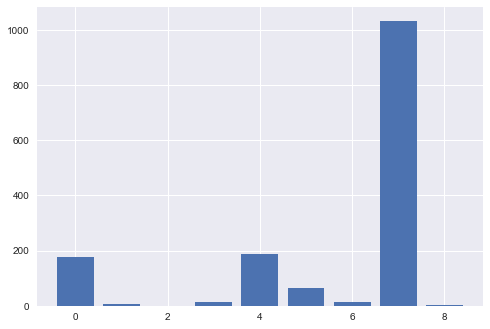

In [274]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [260]:
df_model.columns

Index(['Des_I', 'Emp_I', 'MES', 'DIANOM', 'TIPOVUELO', 'atraso_15',
       'periodo_dia', 'temporada_alta', 'Semana_del_año',
       'cantidad_vuelos_hora'],
      dtype='object')

In [123]:
classifier= XGBClassifier()
classifier.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = classifier.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

/Users/federicoyoungmendiola/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:54:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/federicoyoungmendiola/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/federicoyoungmendiola/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/federicoyoungmendiola/opt/ana

Mean ROC AUC in train: 0.68123
ROC AUC in test: 0.68924
[13:54:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explic

Text(91.68, 0.5, 'predicted label')

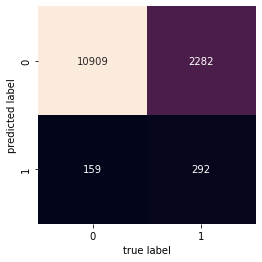

In [202]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [96]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(classifier, X_test, y_test)


In [99]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [100]:
classifier.feature_importances_

array([0.00246591, 0.00208644, 0.        , 0.01420362, 0.01554382,
       0.01435067, 0.00260319, 0.00448388, 0.00070626, 0.00906726,
       0.00585562, 0.00229809, 0.00580459, 0.00321288, 0.00435009,
       0.00304636, 0.05114862, 0.0110447 , 0.00785658, 0.00765048,
       0.00959368, 0.00633709, 0.0091963 , 0.        , 0.00262085,
       0.        , 0.        , 0.00210175, 0.        , 0.        ,
       0.        , 0.00195715, 0.00867241, 0.00467387, 0.00340745,
       0.00413971, 0.00248507, 0.00599505, 0.0034878 , 0.00376445,
       0.00348205, 0.00265068, 0.00473059, 0.00294904, 0.00131002,
       0.00462273, 0.00448109, 0.00302782, 0.00423773, 0.00319305,
       0.0040815 , 0.        , 0.        , 0.01022817, 0.00519338,
       0.        , 0.00229401, 0.00082279, 0.00501096, 0.        ,
       0.        , 0.00481747, 0.00601212, 0.030361  , 0.01929614,
       0.01384255, 0.01813712, 0.00553467, 0.0003632 , 0.00611021,
       0.        , 0.        , 0.        , 0.        , 0.     

In [103]:
X_train.columns

Index(['cantidad_vuelos_hora', 'Des_I_EGLL', 'Des_I_EGYP', 'Des_I_KATL',
       'Des_I_KDFW', 'Des_I_KIAH', 'Des_I_KJFK', 'Des_I_KLAX', 'Des_I_KMCO',
       'Des_I_KMIA',
       ...
       'Semana_del_año_48', 'Semana_del_año_49', 'Semana_del_año_5',
       'Semana_del_año_50', 'Semana_del_año_51', 'Semana_del_año_52',
       'Semana_del_año_6', 'Semana_del_año_7', 'Semana_del_año_8',
       'Semana_del_año_9'],
      dtype='object', length=162)

In [118]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

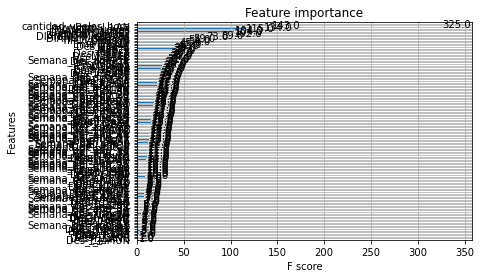

In [110]:
plot_importance(classifier)

<BarContainer object of 162 artists>

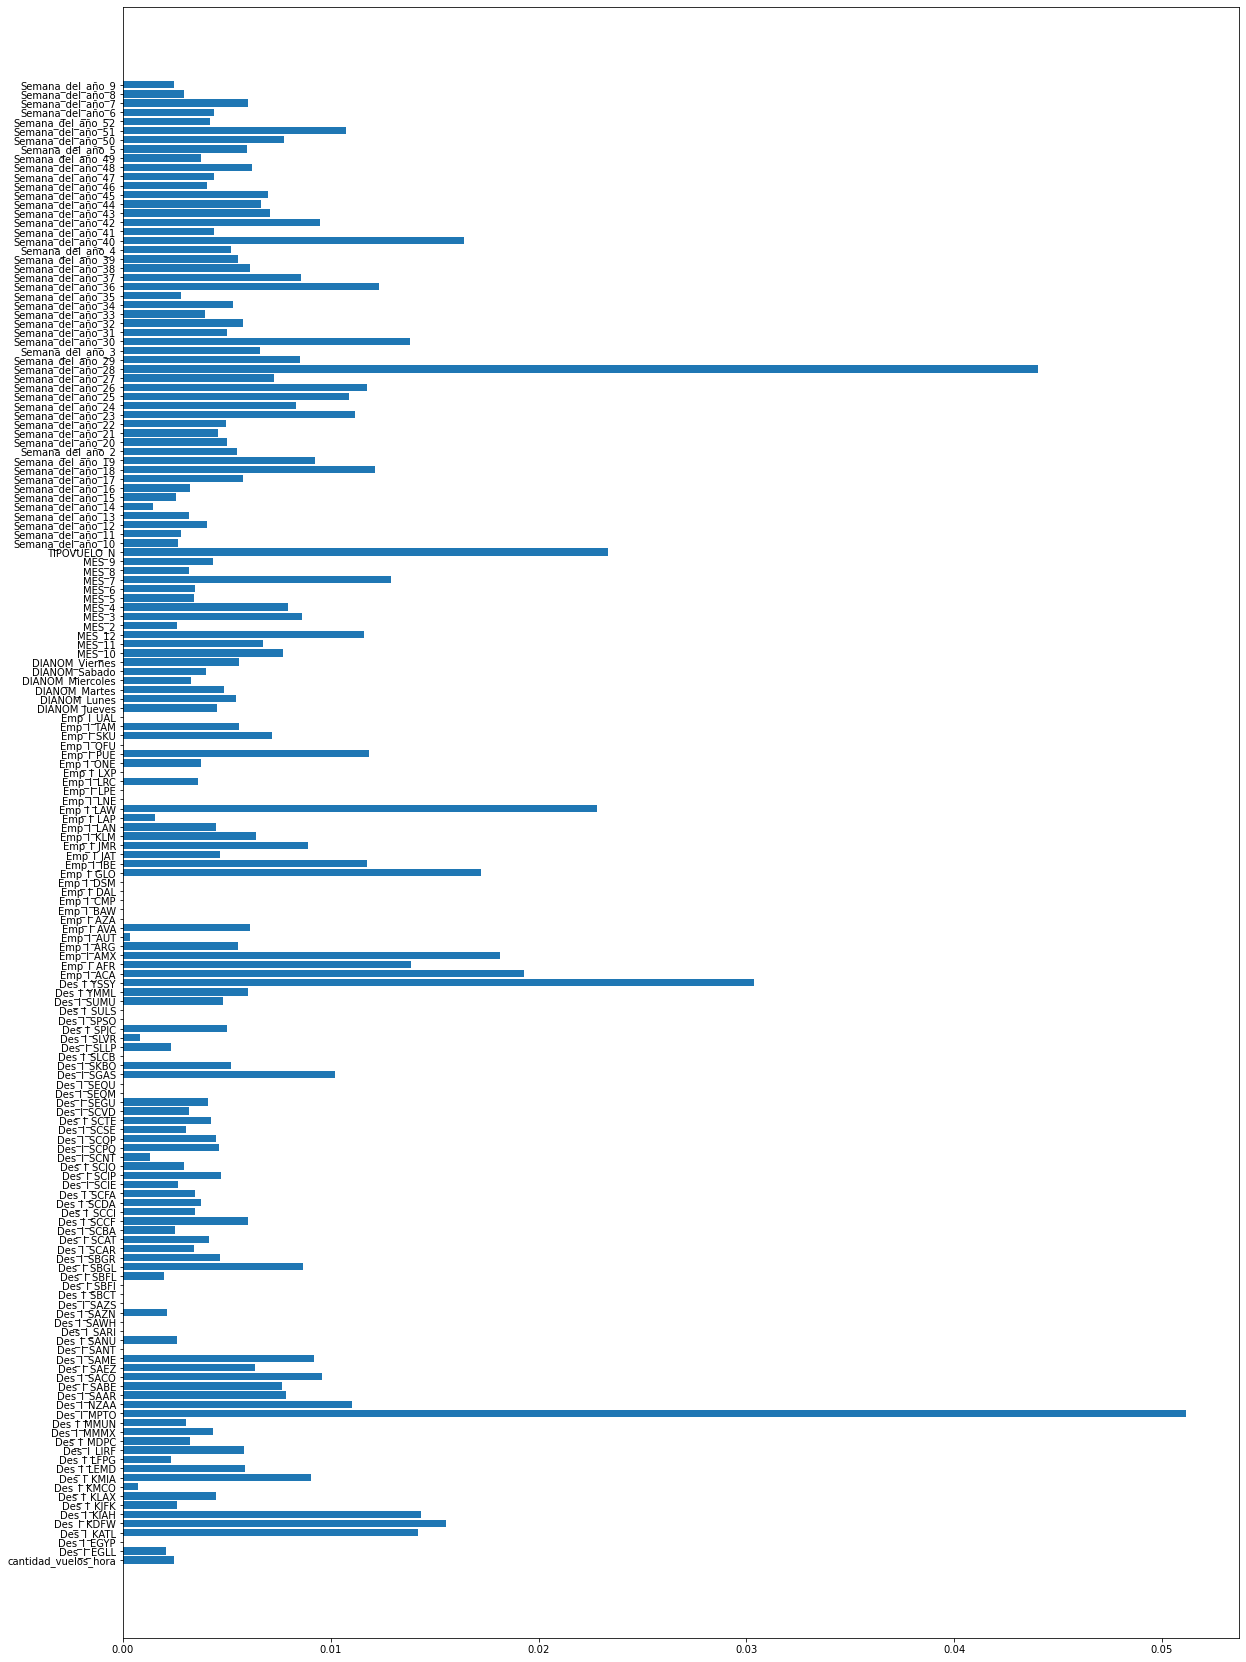

In [116]:
f, ax = plt.subplots(figsize=(20,30))
plt.barh(X_train.columns, classifier.feature_importances_)


### AdaBoost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostclf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [173]:
features_to_model = ['Des_I','Emp_I','DIANOM','MES','TIPOVUELO','Semana_del_año','cantidad_vuelos_hora','retraso']
target = 'retraso'
test_size= 0.2
random_state = 42

In [174]:
df_model_final = pd.get_dummies(df_model, drop_first = True )

In [175]:
X_train, X_test, y_train, y_test = train_test_split(df_model_final.drop(target,axis=1),
                                                df_model_final[target],
                                                test_size = test_size,
                                                random_state = random_state,
                                                stratify=df_model_final[target] #due to imbalanced data
                                               )

In [158]:
AdaBoostclf.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(AdaBoostclf, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = AdaBoostclf.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

Mean ROC AUC in train: 0.68826
ROC AUC in test: 0.68679


In [176]:
AdaBoostclf.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(AdaBoostclf, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = AdaBoostclf.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

Mean ROC AUC in train: 0.67096
ROC AUC in test: 0.67421


### Random Forest

In [159]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(RF, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities_RF = RF.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities_RF)
print('ROC AUC in test: %.5f' % result_test)

Mean ROC AUC in train: 0.69127
ROC AUC in test: 0.69280


In [177]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(RF, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities_RF = RF.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities_RF)
print('ROC AUC in test: %.5f' % result_test)

Mean ROC AUC in train: 0.62589
ROC AUC in test: 0.64313


### Neural Network

In [40]:
!pip install keras
!pip install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=0c8ce711c8d31d23fc86140b85fa2929276eb8bd7755857477aaea20ccaaf753
  Stored in directory: c:\users\federico young\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: i

In [44]:
import tensorflow as tf

In [160]:
import keras

model = keras.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               49800     
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 301       
                                                                 
Total params: 51,301
Trainable params: 50,701
Non-trainable params: 600
_________________________________________________________________


In [161]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC()])

In [162]:
r = model.fit(
    X_train,
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=2048, 
    epochs=20,#     class_weight=class_weight,
)

Epoch 1/20
27/27 [==============================] - 3s 52ms/step - loss: 0.7420 - auc_4: 0.5796 - val_loss: 0.5592 - val_auc_4: 0.6547
Epoch 2/20
27/27 [==============================] - 1s 37ms/step - loss: 0.5774 - auc_4: 0.6231 - val_loss: 0.5010 - val_auc_4: 0.6803
Epoch 3/20
27/27 [==============================] - 1s 40ms/step - loss: 0.5074 - auc_4: 0.6481 - val_loss: 0.4723 - val_auc_4: 0.6941
Epoch 4/20
27/27 [==============================] - 1s 40ms/step - loss: 0.4682 - auc_4: 0.6747 - val_loss: 0.4649 - val_auc_4: 0.6989
Epoch 5/20
27/27 [==============================] - 1s 41ms/step - loss: 0.4549 - auc_4: 0.6854 - val_loss: 0.4629 - val_auc_4: 0.7025
Epoch 6/20
27/27 [==============================] - 1s 44ms/step - loss: 0.4428 - auc_4: 0.7035 - val_loss: 0.4613 - val_auc_4: 0.7079
Epoch 7/20
27/27 [==============================] - 1s 42ms/step - loss: 0.4340 - auc_4: 0.7174 - val_loss: 0.4596 - val_auc_4: 0.7088
Epoch 8/20
27/27 [==============================] - 1s 

In [61]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

427/427 [==============================] - 1s 2ms/step


In [49]:
# summarize performance in test
pred_probabilities = model.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
# split into input (X) and output (Y) variables
# encode class values as integers
# baseline model
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=5,scoring='roc_auc',n_jobs=-1)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### SVC

In [ ]:
model2 = svm.SVC()

### Comparacion entre modelos

In [163]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, RF.predict_proba(X_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, AdaBoostclf.predict_proba(X_test)[:, 1], pos_label=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, model.predict(X_test).ravel())

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

427/427 [==============================] - 1s 2ms/step


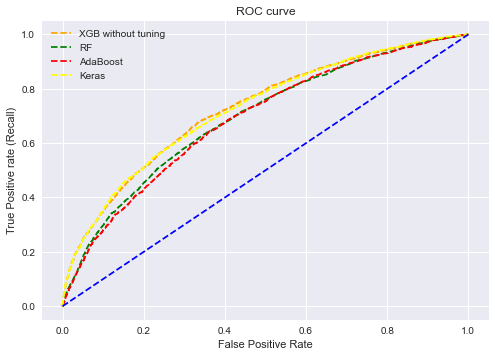

In [164]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB without tuning')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RF')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='AdaBoost')
plt.plot(fpr_keras, tpr_keras, linestyle='--',color='yellow', label='Keras')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate (Recall)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     11068
           1       0.62      0.11      0.18      2574

    accuracy                           0.82     13642
   macro avg       0.72      0.55      0.54     13642
weighted avg       0.79      0.82      0.76     13642



## Best model select features

In [208]:
def cleaning_data(df: pd.DataFrame,
                  feature: str,
                  n: int
                 ):
    """ Reduce cardinality for high cardinality features...
    also some cleaning in hw_offers_discounts...
    and check and fill back null values
    """        
    new_df = df.copy
    top = new_df(['Emp_I']).value_counts().index[:n]
    new_df(['Emp_I']).apply(lambda x: x if x in top else 'Out of top '+str(n)+' categories')
    return new_df 

In [234]:
n=15
top = df_model['Des_I'].value_counts().index[:n]
df_model['Des_I'] = df_model['Des_I'].apply(lambda x: x if x in top else 'Out of top '+str(n)+' categories')

In [235]:
n=10
top = df_model['Emp_I'].value_counts().index[:n]
df_model['Emp_I'] = df_model['Emp_I'].apply(lambda x: x if x in top else 'Out of top '+str(n)+' categories')

In [236]:
df_model_new = (df_model.assign(vacaciones = df_model['Semana_del_año'].apply(lambda x: 1 if x in vacaciones else 0))
            .drop('Semana_del_año',axis=1)
           )


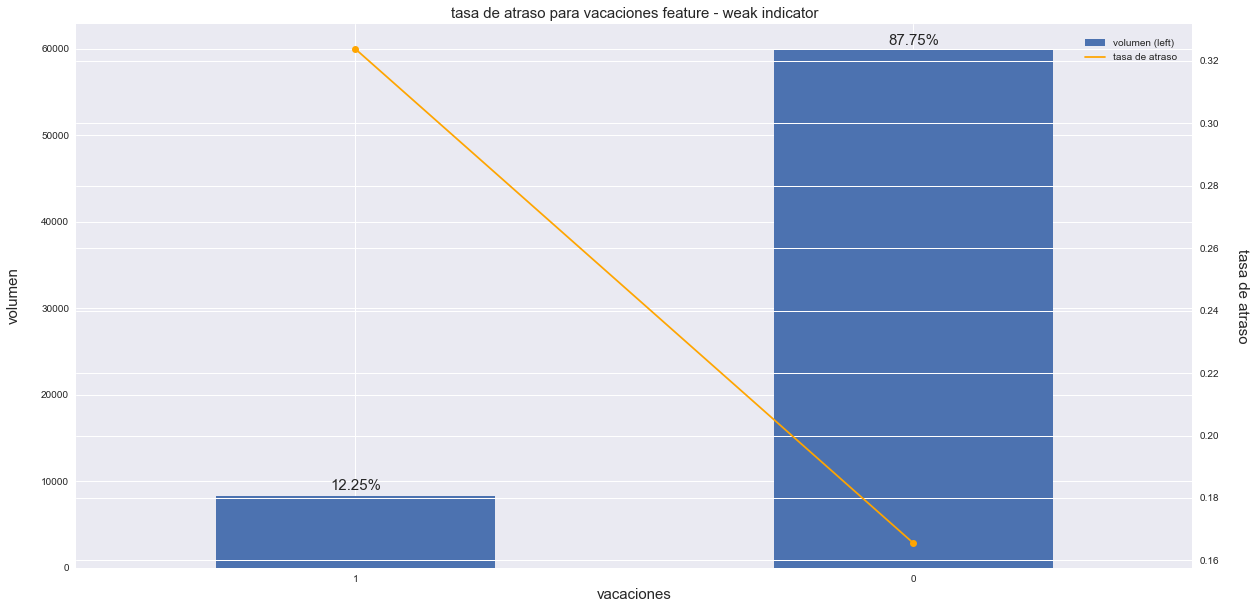

In [237]:
iv_df , iv = data_vars(df_model_new[['vacaciones']],df_model_new['atraso_15']) 
plot_bivariant(iv_df, 'vacaciones', 'vacaciones')

In [238]:
df_model_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Des_I                 68206 non-null  object
 1   Emp_I                 68206 non-null  object
 2   MES                   68206 non-null  object
 3   DIANOM                68206 non-null  object
 4   TIPOVUELO             68206 non-null  object
 5   atraso_15             68206 non-null  int32 
 6   periodo_dia           68206 non-null  object
 7   temporada_alta        68206 non-null  int32 
 8   cantidad_vuelos_hora  68206 non-null  int32 
 9   vacaciones            68206 non-null  int64 
dtypes: int32(3), int64(1), object(6)
memory usage: 4.4+ MB


In [239]:
df_model_final_new = pd.get_dummies(df_model_new, drop_first = True )

In [240]:
df_model_final_new

,atraso_15,temporada_alta,cantidad_vuelos_hora,vacaciones,Des_I_Out of top 15 categories,Des_I_SABE,Des_I_SAEZ,Des_I_SBGR,Des_I_SCAR,Des_I_SCAT,...,MES_9,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,TIPOVUELO_N,periodo_dia_noche,periodo_dia_tarde
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
68202,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
68203,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
68204,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [241]:
X_train, X_test, y_train, y_test = train_test_split(df_model_final_new.drop(target,axis=1),
                                                df_model_final_new[target],
                                                test_size = test_size,
                                                random_state = random_state,
                                                stratify=df_model_final_new[target] #due to imbalanced data
                                               )

In [242]:
model = keras.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               14700     
                                                                 
 batch_normalization_5 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 301       
                                                                 
Total params: 16,201
Trainable params: 15,601
Non-trainable params: 600
_________________________________________________________________


In [243]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC()])

In [244]:
r = model.fit(
    X_train,
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=2048, 
    epochs=20,#     class_weight=class_weight,
)

Epoch 1/20
27/27 [==============================] - 3s 52ms/step - loss: 0.7502 - auc_5: 0.5588 - val_loss: 0.5440 - val_auc_5: 0.6367
Epoch 2/20
27/27 [==============================] - 1s 34ms/step - loss: 0.5870 - auc_5: 0.5982 - val_loss: 0.4938 - val_auc_5: 0.6561
Epoch 3/20
27/27 [==============================] - 1s 34ms/step - loss: 0.5202 - auc_5: 0.6157 - val_loss: 0.4720 - val_auc_5: 0.6664
Epoch 4/20
27/27 [==============================] - 1s 37ms/step - loss: 0.4849 - auc_5: 0.6365 - val_loss: 0.4669 - val_auc_5: 0.6668
Epoch 5/20
27/27 [==============================] - 1s 37ms/step - loss: 0.4726 - auc_5: 0.6474 - val_loss: 0.4654 - val_auc_5: 0.6675
Epoch 6/20
27/27 [==============================] - 1s 39ms/step - loss: 0.4609 - auc_5: 0.6638 - val_loss: 0.4637 - val_auc_5: 0.6755
Epoch 7/20
27/27 [==============================] - 1s 38ms/step - loss: 0.4545 - auc_5: 0.6746 - val_loss: 0.4623 - val_auc_5: 0.6789
Epoch 8/20
27/27 [==============================] - 1s 

In [223]:
classifier= XGBClassifier(base_score=0.5,
                          booster='gbtree',
                          colsample_bylevel=1,
                          colsample_bynode=1,
                          colsample_bytree=0.5,
                          enable_categorical=False, 
                          gamma=0.2, 
                          importance_type=None, 
                          interaction_constraints='',
                          learning_rate=0.3, 
                          max_delta_step=0, 
                          max_depth=4,
                          min_child_weight=5,
                          monotone_constraints='()',
                          n_estimators=100, 
                          n_jobs=8,
                          num_parallel_tree=1, 
                          predictor='auto',
                          random_state=0, 
                          reg_alpha=0, 
                          reg_lambda=1,
                          scale_pos_weight=1,
                          subsample=1, 
                          tree_method='exact', 
                          validate_parameters=1,
                          verbosity=None
                         )
classifier.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = classifier.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

/Users/federicoyoungmendiola/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:48:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/federicoyoungmendiola/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/federicoyoungmendiola/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/federicoyoungmendiola/opt/ana

Mean ROC AUC in train: 0.69299
ROC AUC in test: 0.71705


In [124]:
#Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [125]:
#Define basic model 
xgb_cl_basic = XGBClassifier()

In [126]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [127]:
rs_model = RandomizedSearchCV(xgb_cl_basic,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [128]:
#model fitting
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [129]:
#parameters selected
rs_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [130]:
#Building final classifier model
classifier= XGBClassifier(base_score=0.5,
                          booster='gbtree',
                          colsample_bylevel=1,
                          colsample_bynode=1,
                          colsample_bytree=0.5,
                          enable_categorical=False, 
                          gamma=0.4, 
                          importance_type=None, 
                          interaction_constraints='',
                          learning_rate=0.15, 
                          max_delta_step=0, 
                          max_depth=10,
                          min_child_weight=7,
                          monotone_constraints='()',
                          n_estimators=100, 
                          n_jobs=8,
                          num_parallel_tree=1, 
                          predictor='auto',
                          random_state=0, 
                          reg_alpha=0, 
                          reg_lambda=1,
                          scale_pos_weight=1,
                          subsample=1, 
                          tree_method='exact', 
                          validate_parameters=1,
                          verbosity=None
                         )

In [131]:
classifier.fit(X_train, y_train)


# evaluate model
scores = cross_val_score(classifier, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = classifier.predict_proba(X_test)[:, 1]
result_test = roc_auc_score(y_test, pred_probabilities)
print('ROC AUC in test: %.5f' % result_test)

Mean ROC AUC in train: 0.71922
ROC AUC in test: 0.72145


In [166]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)